#Estructura del Dashboard

##Parte 1: Instalar e Importar Librerias

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install -U -q PyDrive

Importando librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

###Cargaremos y Previsualizaremos el conjunto de Datos, en este caso el excel

In [ ]:
# Autenticación
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace with the correct file ID from the URL
file_id = "1LYZWcK8RHVM9YVwXoZgQQWqjy9KBH1og2di2v1O2FSI"
downloaded = drive.CreateFile({'id': file_id})

# Export the file to xlsx format before downloading
downloaded.GetContentFile('Ventas_Moops_2024_2025.xlsx', mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

# Leer el archivo
import pandas as pd
df = pd.read_excel("Ventas_Moops_2024_2025.xlsx")
df.head()

,Diseños pedidos,Modelo de celular,Modelo numero,Talla,Tamaño,Diseño completos,Anticipo,Pagos,Tipo de Fundas,Color,Cliente,Producto,Lugar,Fecha de entrega,Red social de venta,Precio,Lugares de Envio
0,RICK PEPINILLO,Iphone,16,NaN,NaN,si,si,COMPLETO,Marco,Transparente,Alfredo,Funda,CDMX,2024-01-18,Facebook,320,NaN
1,Ferxxo,Iphone,13,NaN,NaN,si,si,COMPLETO,Acrigel,Transparente,Alfredo,Funda,CDMX,2024-01-15,Facebook,200,NaN
2,PAISAJE CON ERNESTO,Iphone,14,NaN,NaN,no,si,COMPLETO,Marco,Transparente,Ricardo,Funda,CDMX,2024-01-16,Facebook,320,NaN
3,PAISAJE CON ERNESTO,Iphone,14,NaN,NaN,no,si,COMPLETO,Marco,Transparente,Ricardo,Funda,CDMX,2024-03-14,Facebook,320,NaN
4,Ferxxo,Iphone,14,NaN,NaN,si,si,COMPLETO,Reforzada,Transparente,yayoo,Funda,CDMX,2024-04-10,Facebook,290,NaN


###Exploraremos los datos que se encuentran en la tabla, los datos necesarios e importantes

Visualizaremos los tipos de datos

In [ ]:
df.dtypes

,0
Diseños pedidos,object
Modelo de celular,object
Modelo numero,object
Talla,object
Tamaño,object
Diseño completos,object
Anticipo,object
Pagos,object
Tipo de Fundas,object
Color,object


**Analizaremos los nombres de las columnas para usarlas**

In [ ]:
df.columns

Index(['Diseños pedidos', 'Modelo de celular', 'Modelo numero', 'Talla',
       'Tamaño', 'Diseño completos', 'Anticipo', 'Pagos', 'Tipo de Fundas',
       'Color', 'Cliente', 'Producto ', 'Lugar', 'Fecha de entrega',
       'Red social de venta', 'Precio', 'Lugares de Envio'],
      dtype='object')

Renombraremos la columna Unnamed: 3 a Tamaño

In [ ]:
#RENOMBRAREMOS COLUMNA
df.rename(columns={'Unnamed:3':'Tamaño'},inplace=True)


##

##Estructura


# **MOOPS Dashboard de Ventas**

### *Resumen visual de pedidos, ingresos y comportamiento de clientes*

<ipython-input-18-102ebc456ae5>:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




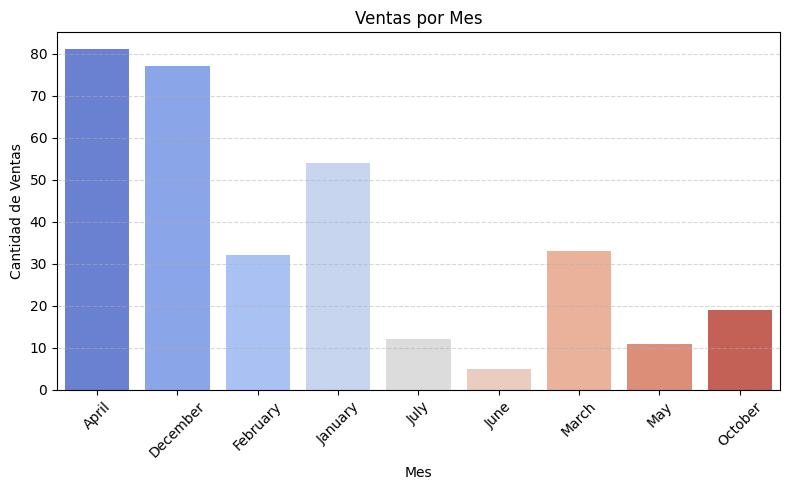

<ipython-input-18-102ebc456ae5>:56: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




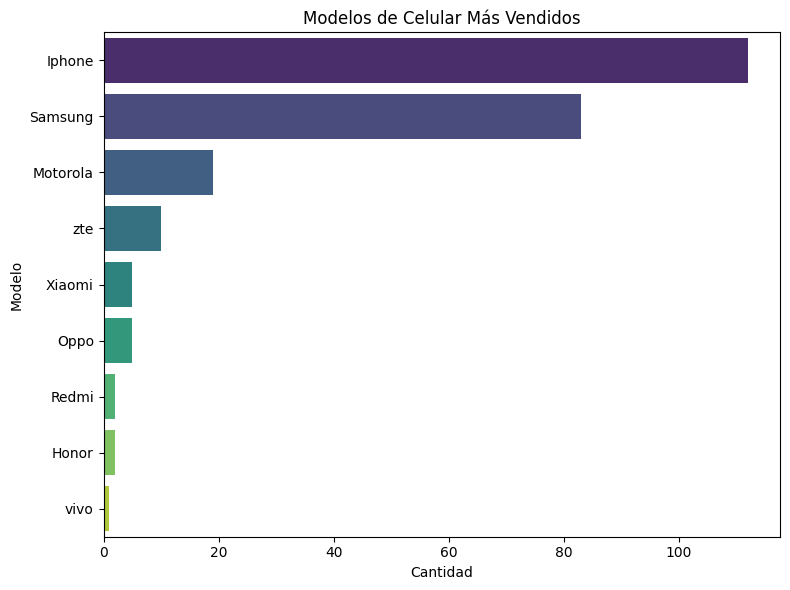

<ipython-input-18-102ebc456ae5>:66: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




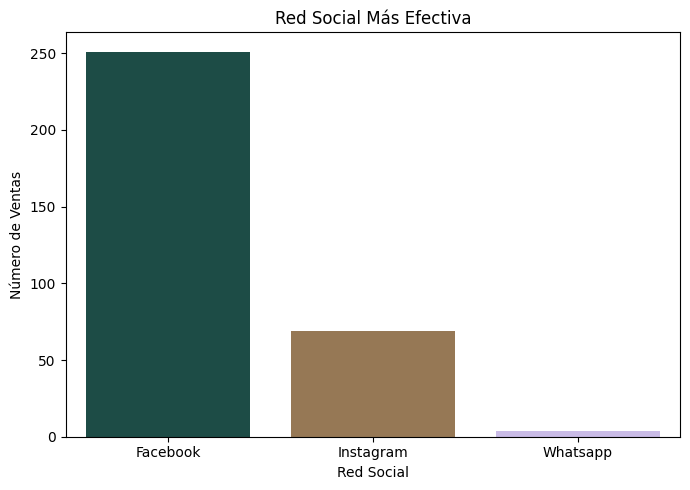

<ipython-input-18-102ebc456ae5>:78: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




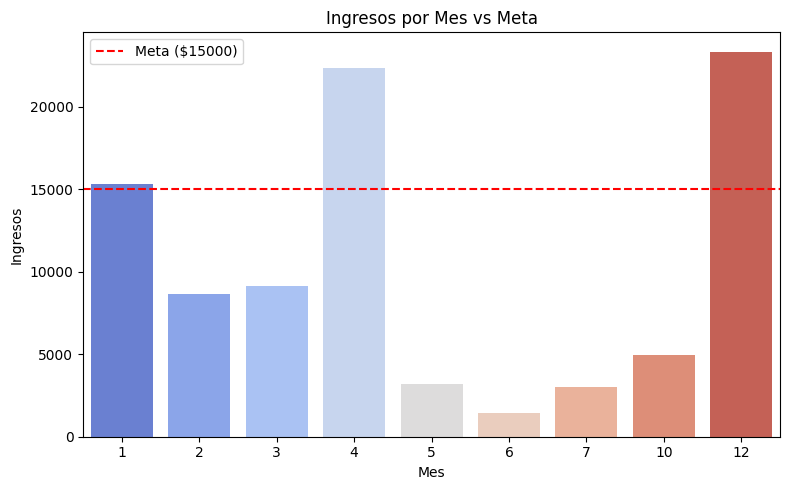

In [ ]:
from IPython.display import display, Markdown

display(Markdown("# **MOOPS Dashboard de Ventas**"))
display(Markdown("### *Resumen visual de pedidos, ingresos y comportamiento de clientes*"))

import plotly.graph_objects as go

# Cálculo de métricas
ingreso_total = df['Precio'].sum()
ticket_promedio = df.groupby('Cliente')['Precio'].sum().mean()
producto_mas_vendido = df['Producto '].value_counts().idxmax()
cliente_frecuente = df['Cliente'].value_counts().idxmax()

# KPI Cards
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number",
    value=ingreso_total,
    title={"text": "Ingreso Total"},
    domain={'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode="number",  # Change mode to 'number'
    value=len(df[df['Producto '] == producto_mas_vendido]),  # Display the count of the most sold product
    title={"text": "Producto + Vendido: " + producto_mas_vendido},  # Include product name in the title
    domain={'row': 1, 'column': 0}))

fig.update_layout(
    grid={'rows': 2, 'columns': 2, 'pattern': "independent"},
    height=600,
    margin=dict(t=50, b=30)
)

fig.show()

# Preparación de datos
df['Fecha de entrega'] = pd.to_datetime(df['Fecha de entrega'], errors='coerce')
df['Mes'] = df['Fecha de entrega'].dt.strftime('%B')
ventas_mes = df['Mes'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=ventas_mes.index, y=ventas_mes.values, palette="coolwarm")
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

modelos = df['Modelo de celular'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=modelos.values, y=modelos.index, palette="viridis")
plt.title("Modelos de Celular Más Vendidos")
plt.xlabel("Cantidad")
plt.ylabel("Modelo")
plt.tight_layout()
plt.show()

redes = df['Red social de venta'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=redes.index, y=redes.values, palette="cubehelix")
plt.title("Red Social Más Efectiva")
plt.xlabel("Red Social")
plt.ylabel("Número de Ventas")
plt.tight_layout()
plt.show()

df['Mes_num'] = df['Fecha de entrega'].dt.month
ingresos_mensuales = df.groupby('Mes_num')['Precio'].sum().sort_index()

meta = 15000  # o 20000 para otra comparación
plt.figure(figsize=(8, 5))
sns.barplot(x=ingresos_mensuales.index, y=ingresos_mensuales.values, palette='coolwarm')
plt.axhline(meta, color='red', linestyle='--', label=f'Meta (${meta})')
plt.title('Ingresos por Mes vs Meta')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.legend()
plt.tight_layout()
plt.show()